# SELECCIÓN DE PARÁMETROS DE LA VOZ PARA EL DIAGNÓSTICO Y MONITOREO DE PACIENTES CON LA ENFERMEDAD DEL PARKINSON

Jairo David Narro Silva
<p> <a href="https://drive.google.com/file/d/16HFtPKzCKs1AiQ3NOW1zpAqv4aRtPAbZ/view?usp=sharing"> Puede leer el artículo aquí</a> </p>

---
**Abstract:** La enfermedad de Parkinson Idiopática (IDP) es el segundo trastorno neurodegenerativo más común en el mundo. Debido a la inexistencia de una cura, los tratamientos actuales solo se enfocan en mejorar la calidad de vida al tratar de ralentizar el avance de la enfermedad. Por lo tanto, los pacientes requieren monitoreo constante y continuas visitas a las clínicas. Debido a esto, es necesaria la identificación de marcadores biológicos que permitan no solo el diagnóstico temprano de la enfermedad sino también el telemonitoreo de los pacientes. Distintos parámetros de las señales vocales pueden ser utilizados como potenciales marcadores para el seguimiento de la enfermedad del Parkinson. En este artículo presentamos los resultados de la aplicación de un modelo de Machine Learning para la selección de parámetros de la voz relevantes que permitan monitorear a un paciente con IPD. Esto se hizo a partir de una base de datos que contenía 195 registros de voz provenientes de personas sanas y pacientes con IPD. El modelo de clasificación que obtuvo el mejor resultado fue k-nearest neighbors, con una precisión de 97.8%.  Así mismo, se identificó a los atributos HNR, RPDE y DFA cómo potenciales parámetros de la voz para el diagnóstico y monitoreo de pacientes.

---
**1) BASE DE DATOS**
<p style='text-align: justify;'> La base de datos utilizada corresponde a 195 registros de voz pertenecientes a 31 personas, de las cuales 23 presentan IPD. La data se encuentra disponible en el repositorio de Machine Learning de la Universidad de California. Contiene 22 parámetros de la voz (variables independientes), una variable que indica el nombre del sujeto y el número de la grabación y un atributo clasificatorio (variable dependiente) denominado ‘status’. Este último atributo adquiere un valor igual a 0 si el registro de voz pertenece a una persona sana o igual a 1 si pertenece a una persona con IPD. </p>

---

In [1]:
import pandas as pd
df = pd.read_csv('parkinsons.data')
df





,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


---
**2) BALANCE DE DATOS**
<p style='text-align: justify;'> Del total de registros, 48 son de personas sanas y 147 de personas con IPD. En casos donde se tienen muchas más instancias de una clase con respecto a otra, los modelos de clasificación estándar tienden a verse abrumados por las clases grandes e ignoran a las pequeñas [7].  Esto se debe a que la mayoría de los algoritmos de machine learning asumen que el número de instancias en cada clase es similar [8]. Para evitar estos errores de sesgo y obtener un resultado más preciso, se redujo el número de instancias de las personas con IPD a 48. De esta forma, los modelos de clasificación fueron entrenados con una base de datos balanceada. </p>

---

In [2]:
data_seleccionada=df.sort_values("status")
data_balanceada = data_seleccionada.iloc[0:96]
data_balanceada['status'].value_counts()

1    48
0    48
Name: status, dtype: int64

---
**3) SEPARACIÓN DE DATOS**
<p style='text-align: justify;'> La base de datos se separa en personas con Parkinson y sin Parkinson.</p>

---

In [3]:
data_sanos = data_balanceada.iloc[0:48]
data_parkinson = data_balanceada.iloc[48:96]

attributes = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", 
              "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", 
              "NHR", "HNR", "status","RPDE","DFA", "spread1", "spread2", "D2","PPE"]

**4) CÁLCULO DE MEDIA, MEDIANA, VARIANZA Y DESVIACIÓN ESTÁNDAR** 

In [8]:
import statistics

number_columns = range(1, 24)

for column, attribute in zip(number_columns, attributes):
    print('\033[1m'+ attribute)
    atributo_aislado_1 = data_sanos.iloc[:,column]
    atributo_aislado_2 = data_parkinson.iloc[:,column]
    
    attribute_mean_1 = round(atributo_aislado_1.mean(),4)
    attribute_median_1 = round(atributo_aislado_1.median(),4)
    attribute_variance_1 = round(statistics.variance(atributo_aislado_1),4)
    attribute_stdev_1 = round(statistics.stdev(atributo_aislado_1),4)
    
    table_1 = [[attribute_mean_1, attribute_median_1, attribute_variance_1, attribute_stdev_1]]
    
    attribute_mean_2 = round(atributo_aislado_2.mean(),4)
    attribute_median_2 = round(atributo_aislado_2.median(),4)
    attribute_variance_2 = round(statistics.variance(atributo_aislado_2),4)
    attribute_stdev_2 = round(statistics.stdev(atributo_aislado_2),4)
    
    table_2 = [[attribute_mean_2, attribute_median_2, attribute_variance_2, attribute_stdev_2]]

    
    print('\033[0m')
    print ("               ","{:<10} {:<10} {:<10} {:<10}".format('Media','Mediana','Varianza','Desviación estándar'))

    for v, w in zip(table_1,table_2):
        media_1, mediana_1, varianza_1, desviacion_1 = v
        media_2, mediana_2, varianza_2, desviacion_2 = w
        print ("Sin Parkinson: ","{:<10} {:<10} {:<10} {:<10}".format(media_1, mediana_1, varianza_1, desviacion_1))
        print ("Con Parkinson: ","{:<10} {:<10} {:<10} {:<10}".format(media_2, mediana_2, varianza_2, desviacion_2))
    print('\033[0m')

MDVP:Fo(Hz)

                Media      Mediana    Varianza   Desviación estándar
Sin Parkinson:  181.9378   198.996    2780.5654  52.7311   
Con Parkinson:  145.1988   138.1675   1120.4721  33.4735   

MDVP:Fhi(Hz)

                Media      Mediana    Varianza   Desviación estándar
Sin Parkinson:  223.6368   231.1615   9356.1255  96.7271   
Con Parkinson:  196.7808   159.7185   10056.1607 100.2804  

MDVP:Flo(Hz)

                Media      Mediana    Varianza   Desviación estándar
Sin Parkinson:  145.2073   113.9385   3452.3933  58.7571   
Con Parkinson:  105.5246   97.535     915.1376   30.2512   

MDVP:Jitter(%)

                Media      Mediana    Varianza   Desviación estándar
Sin Parkinson:  0.0039     0.0034     0.0        0.0021    
Con Parkinson:  0.0057     0.0053     0.0        0.0025    

MDVP:Jitter(Abs)

                Media      Mediana    Varianza   Desviación estándar
Sin Parkinson:  0.0        0.0        0.0        0.0       
Con Parkinson:  0.0        0.0      

**5) DISTRIBUCIÓN DE LOS DATOS**

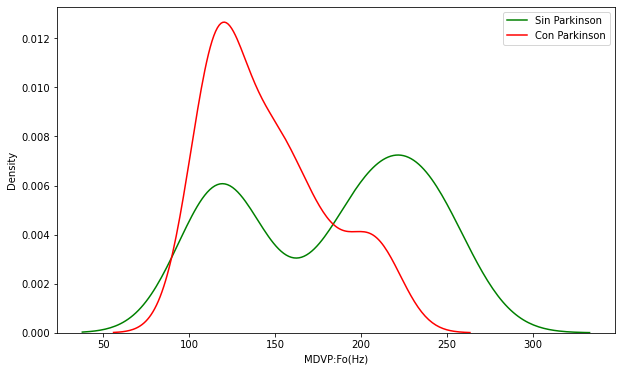

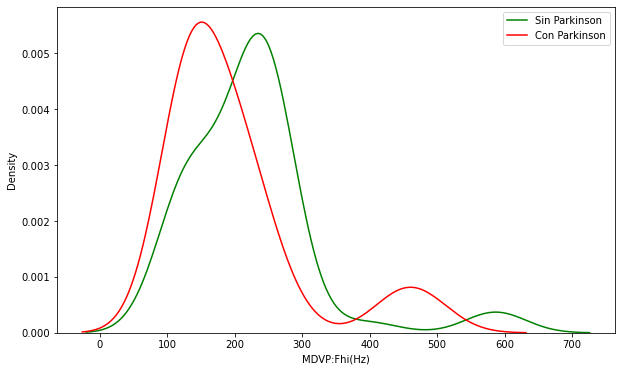

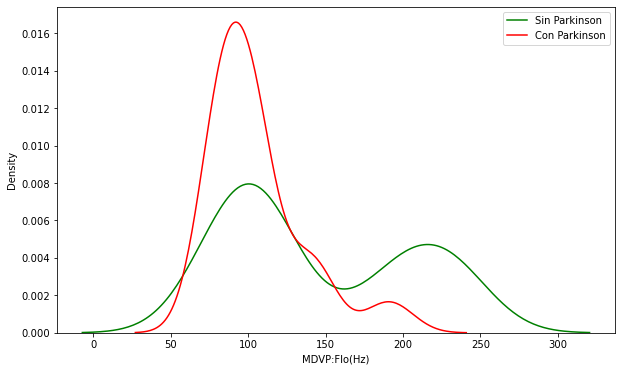

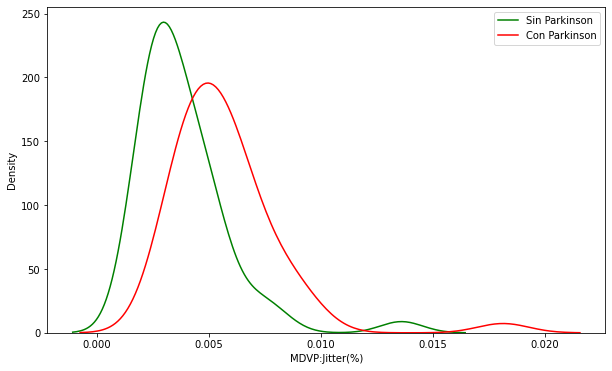

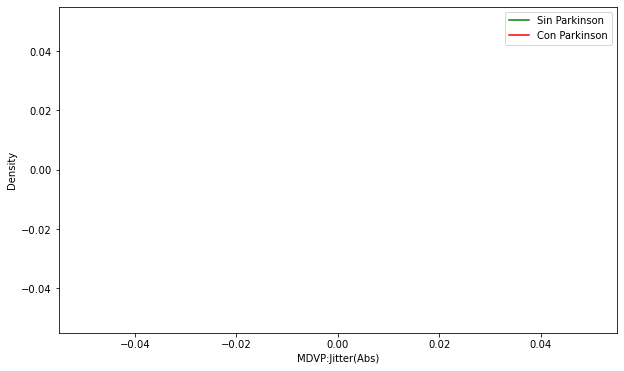

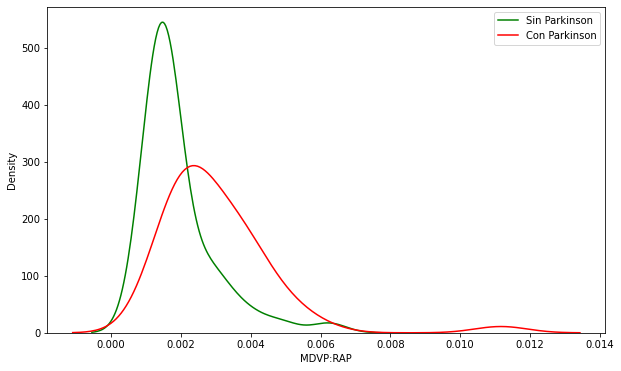

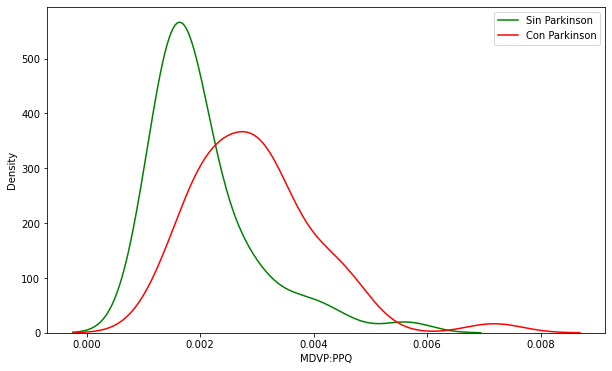

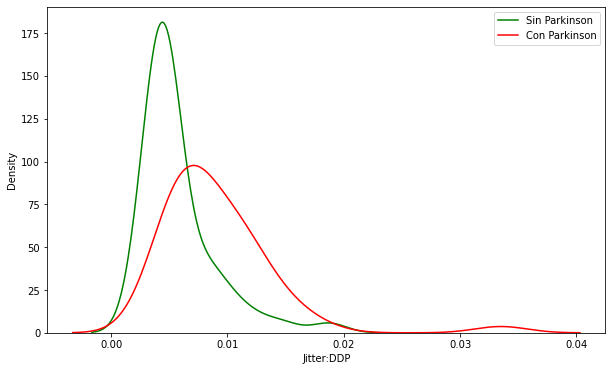

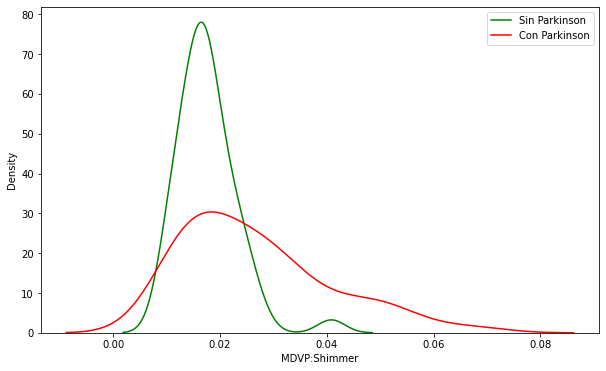

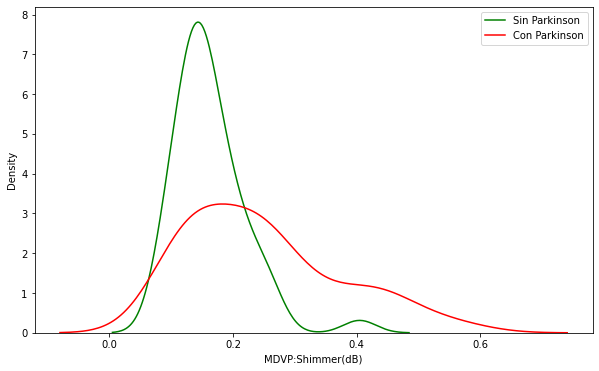

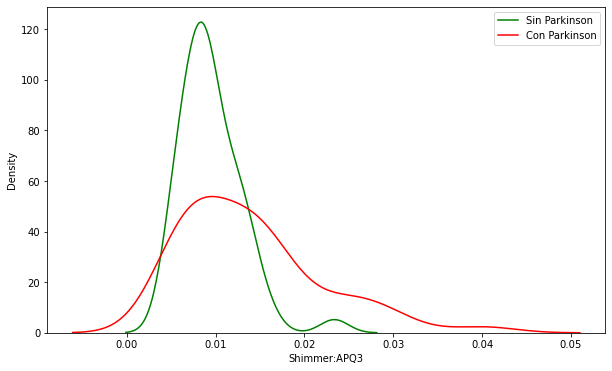

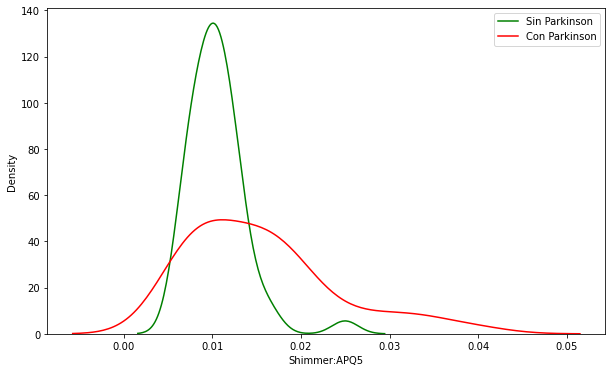

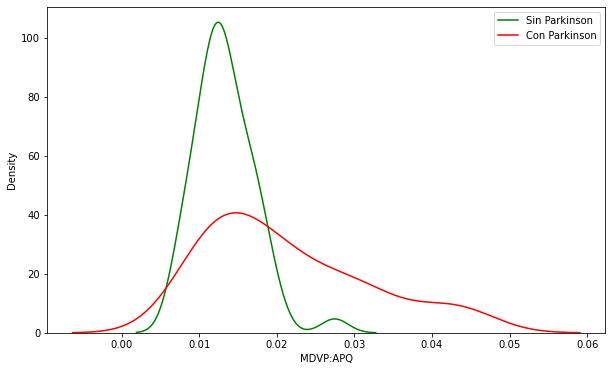

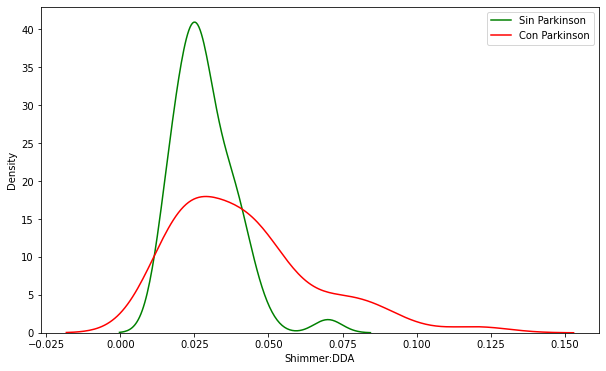

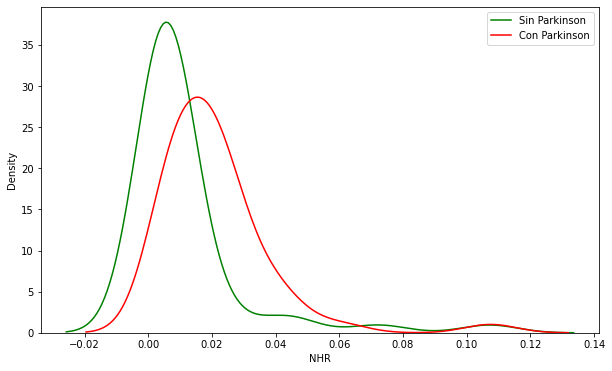

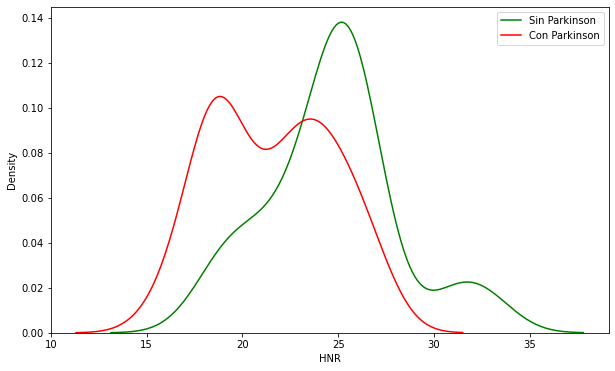

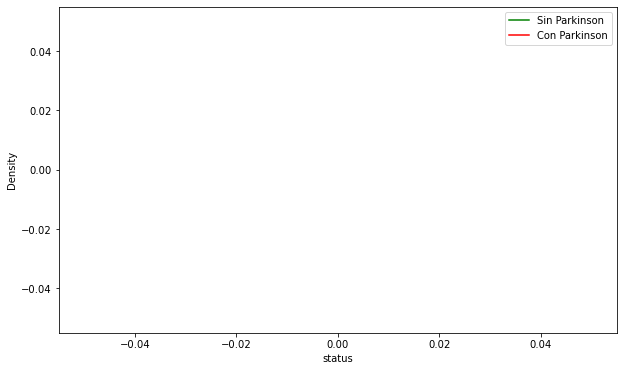

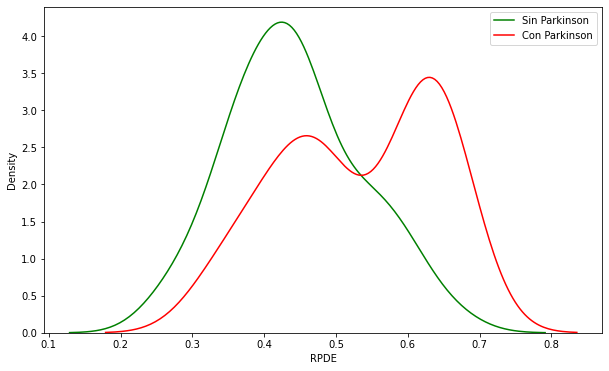

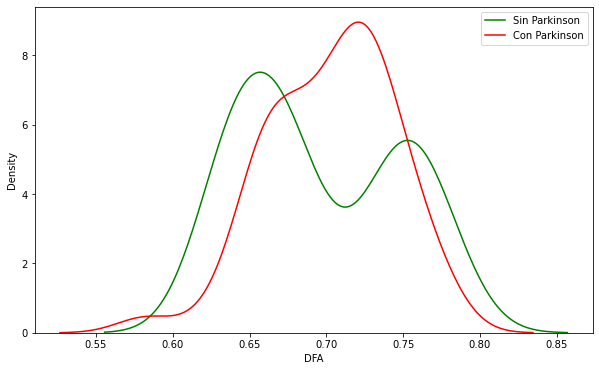

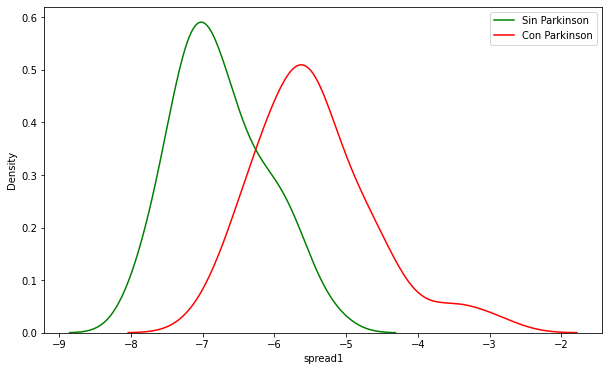

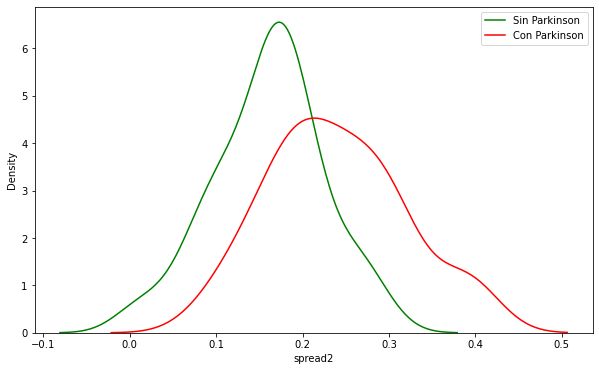

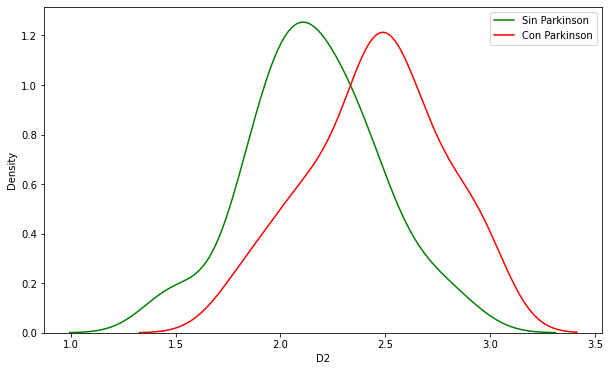

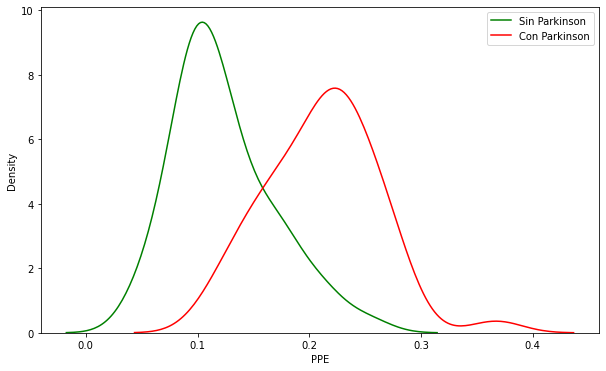

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

for column, attribute in zip(number_columns, attributes):

    y_axis_sanos = data_sanos.iloc[:,column]
    y_axis_parkinson = data_parkinson.iloc[:,column]
    
    fig = plt.figure(figsize=(10,6))
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    sns.distplot(y_axis_sanos, hist=False, color='green')
    sns.distplot(y_axis_parkinson, hist=False, color='red')
    
    line_green = mlines.Line2D([], [], color='green',label='Sin Parkinson')
    line_red = mlines.Line2D([], [], color='red',label='Con Parkinson')
    plt.legend(handles = [line_green,line_red])

    plt.show()
    
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


**6) DIAGRAMA DE CAJA**

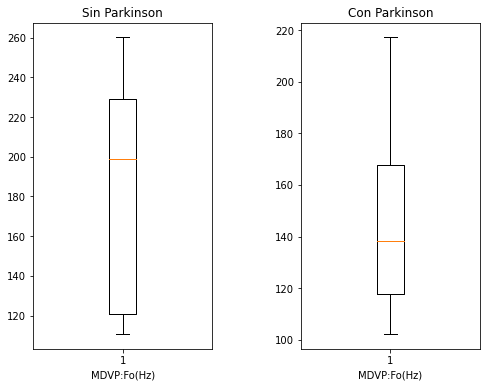

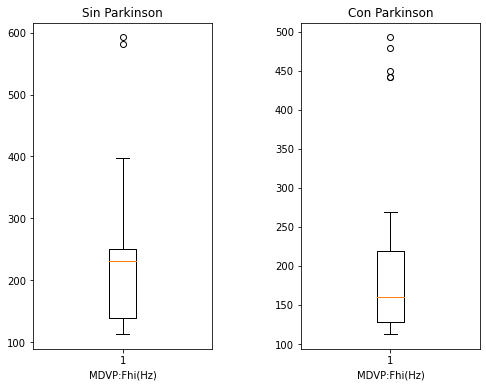

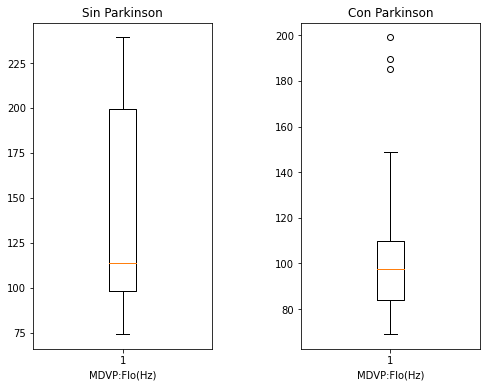

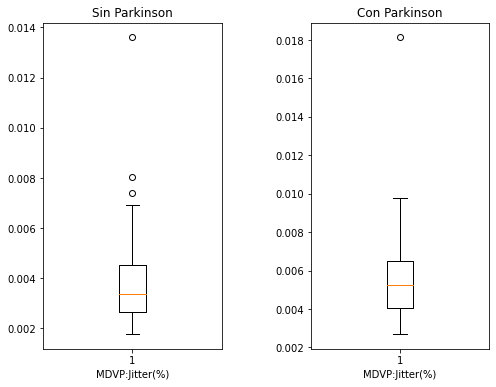

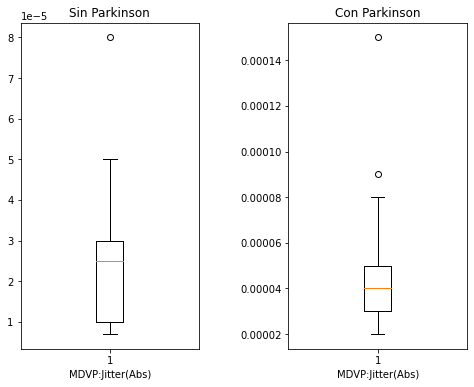

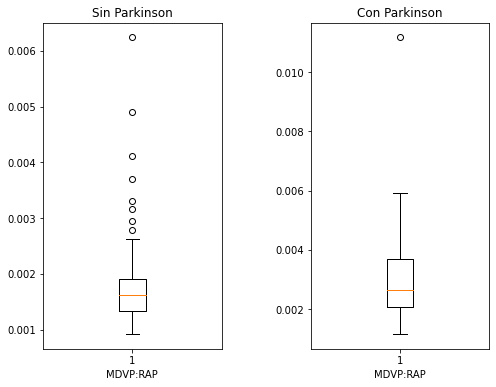

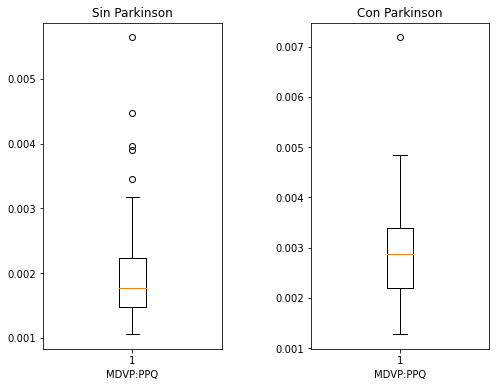

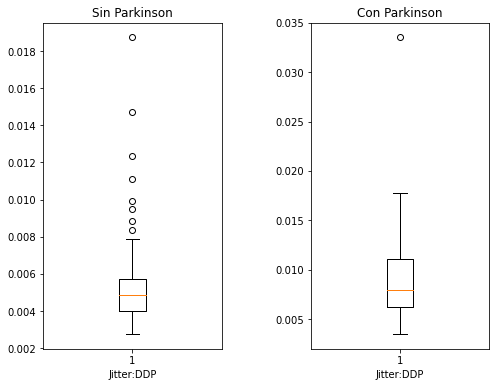

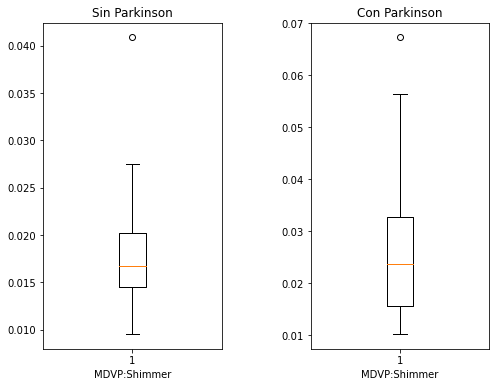

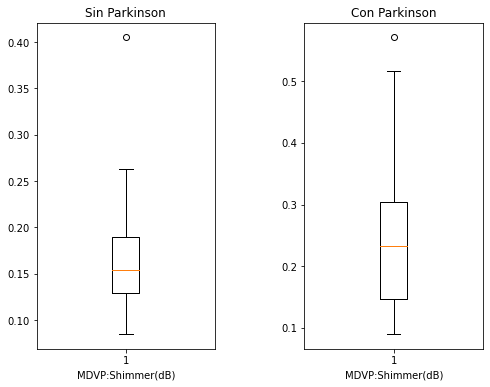

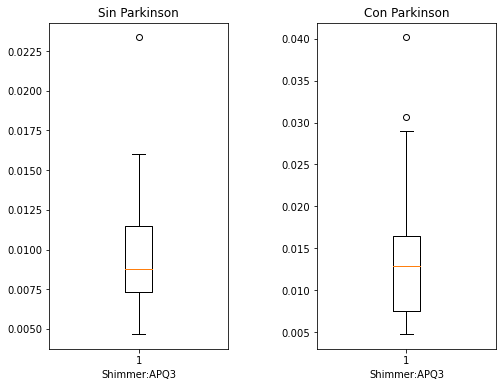

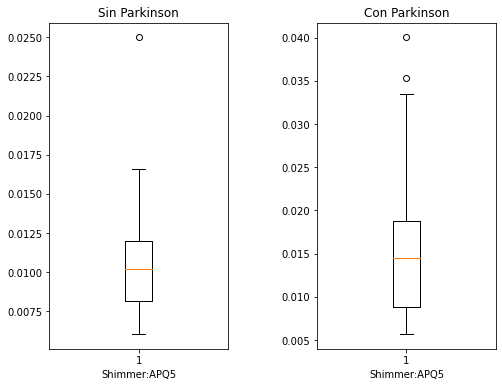

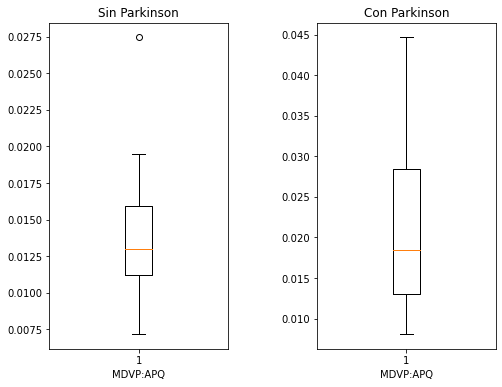

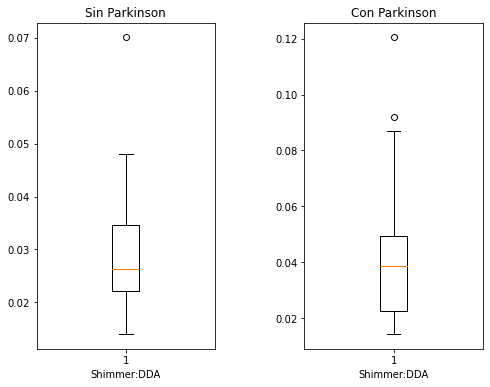

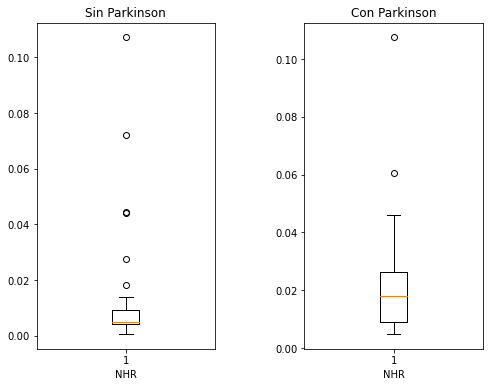

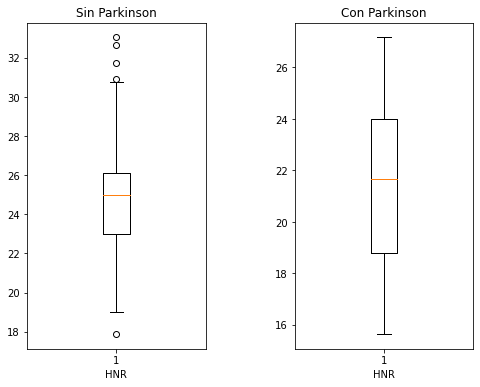

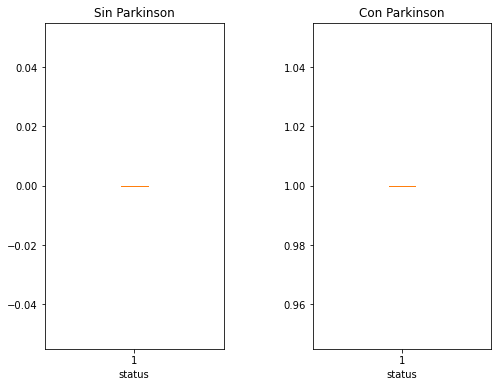

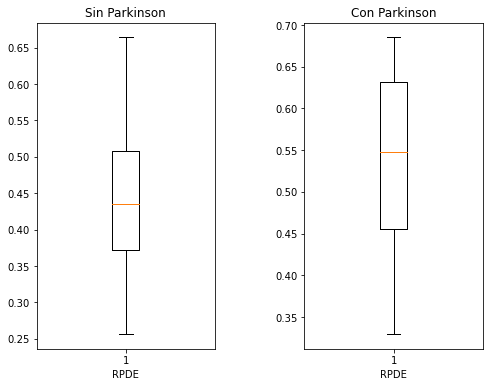

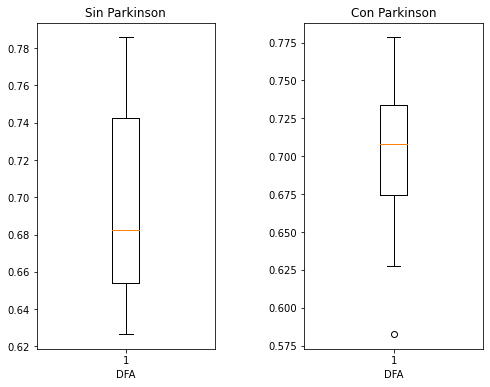

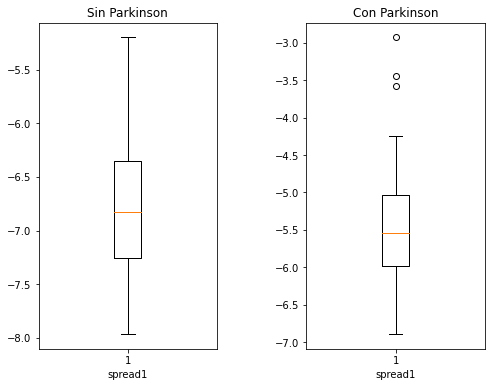

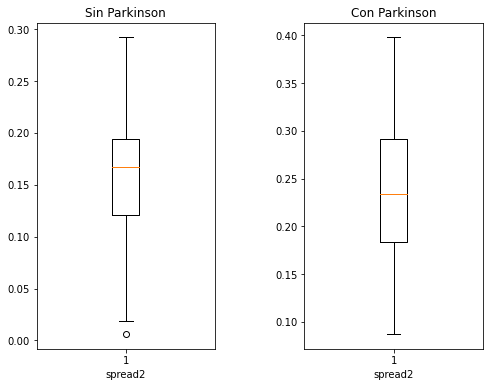

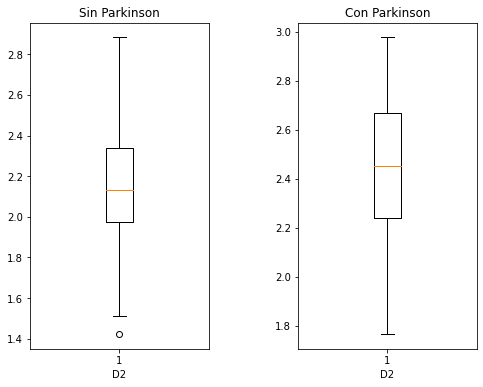

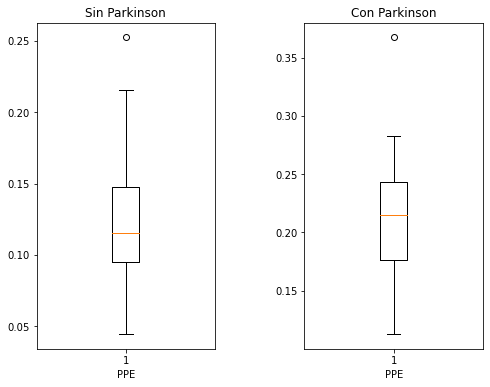

In [32]:
plt.rcParams.update({'figure.max_open_warning': 0})

for column, attribute in zip(number_columns, attributes):
    
    g_sanos = data_sanos.iloc[:,column]
    g_parkinson = data_parkinson.iloc[:,column]
    
    fig = plt.figure(figsize=(8,6))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    plt.subplot(1,2,1)
    data_plot1 = plt.boxplot(g_sanos)
    plt.title("Sin Parkinson")
    plt.xlabel(attribute)
    
    plt.subplot(1,2,2)
    data_plot2 = plt.boxplot(g_parkinson)
    plt.title("Con Parkinson")
    plt.xlabel(attribute)
    
warnings.filterwarnings('ignore')

---
**7) FILTRADO DE ATRIBUTOS POR VARIANZA**
<p style='text-align: justify;'> Se detectaron todas aquellas variables que presentan un valor de varianza pequeño o cercano a cero. Se considera que estas variables no son adecuadas para el entrenamiento del modelo debido a que presentan un valor similar en cada muestra y, por lo tanto, no brindan información útil. </p>

---

In [9]:
round(data_balanceada.var(),4)

MDVP:Fo(Hz)         2270.9775
MDVP:Fhi(Hz)        9786.1821
MDVP:Flo(Hz)        2558.6014
MDVP:Jitter(%)         0.0000
MDVP:Jitter(Abs)       0.0000
MDVP:RAP               0.0000
MDVP:PPQ               0.0000
Jitter:DDP             0.0000
MDVP:Shimmer           0.0001
MDVP:Shimmer(dB)       0.0109
Shimmer:APQ3           0.0000
Shimmer:APQ5           0.0000
MDVP:APQ               0.0001
Shimmer:DDA            0.0004
NHR                    0.0004
HNR                   13.1929
status                 0.2526
RPDE                   0.0121
DFA                    0.0021
spread1                0.9793
spread2                0.0066
D2                     0.1193
PPE                    0.0042
dtype: float64

---
**8) FILTRADO DE ATRIBUTOS POR CORRELACIÓN**
<p style='text-align: justify;'> Si existe una alta correlación entre dos variables, se considera que llevan información similar y por lo tanto sólo una de ellas sería útil para el entrenamiento del modelo. Además, aquellas variables que presenten una correlación baja con la variable objetivo pueden considerarse irrelevantes. </p>

---

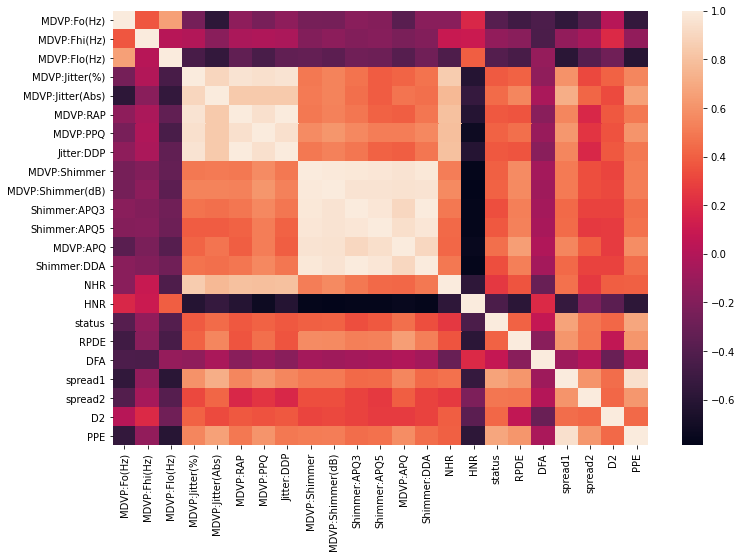

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
sn.heatmap(data_balanceada.corr(),ax=ax)
plt.show()

In [34]:
abs(data_balanceada.corr()["status"])

MDVP:Fo(Hz)         0.387494
MDVP:Fhi(Hz)        0.136451
MDVP:Flo(Hz)        0.394315
MDVP:Jitter(%)      0.380619
MDVP:Jitter(Abs)    0.445038
MDVP:RAP            0.375983
MDVP:PPQ            0.411003
Jitter:DDP          0.375920
MDVP:Shimmer        0.400230
MDVP:Shimmer(dB)    0.408694
Shimmer:APQ3        0.342992
Shimmer:APQ5        0.371658
MDVP:APQ            0.460277
Shimmer:DDA         0.342986
NHR                 0.254311
HNR                 0.433742
status              1.000000
RPDE                0.411025
DFA                 0.077481
spread1             0.666386
spread2             0.488911
D2                  0.430407
PPE                 0.682726
Name: status, dtype: float64

In [80]:
abs(data_balanceada.corr()["status"][abs(data_balanceada.corr()["status"])<0.5]).index.tolist()

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread2',
 'D2']

---
**9) FILTRADO DE ATRIBUTOS USANDO FORWARD SELECTION**
<p style='text-align: justify;'> Se entrena el modelo con un solo atributo y se añaden más atributos de uno a uno en cada paso, seleccionando la combinación que otorga el mejor resultado. Se utilizó el modelo K-Nearest Neighbors ya que se había demostrado antes que era el mejor modelo de clasificación para esta base de datos.</p>

---

In [13]:
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(1)

X = data_balanceada.drop(['name','status'], axis=1).values
X = StandardScaler().fit_transform(X)
y = data_balanceada['status'].values

sfs = SFS(classifier, k_features=(1,8), forward=True, floating = False,
          verbose=2, scoring='accuracy',cv=10, n_jobs=-1).fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    2.7s finished

[2021-08-21 16:00:54] Features: 1/8 -- score: 0.718888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2021-08-21 16:00:54] Features: 2/8 -- score: 0.861111111111111[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2021-08-21 16:00:55] Features: 3/8 -- score: 0.9033333333333335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | el

In [66]:
#Las variables que componen la mejor combinación
sfs.k_feature_names_

('0', '1', '4', '14', '15', '16', '17', '18')

---
**10) FILTRADO DE ATRIBUTOS USANDO BACKWARD SELECTION**

Se entrena el modelo con todos los atributos, eliminando en cada paso el atributo menos relevante.

---

In [14]:
sbs = SFS(classifier, k_features=(1,8), forward=False, floating = False,
          verbose=2, scoring='accuracy',cv=10, n_jobs=-1).fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2021-08-21 16:01:08] Features: 21/1 -- score: 0.8922222222222222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2021-08-21 16:01:08] Features: 20/1 -- score: 0.9022222222222223[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2021-08-21 16:01:09] Features: 19/1 -- score: 0.9022222222222223[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19

In [64]:
#Las variables que componen la mejor combinación
sbs.k_feature_names_

('0', '5', '9', '15', '16', '17', '18', '20')

---
**11) Combinaciones**
<p style='text-align: justify;'> Teniendo en cuenta el valor de varianza, los resultados de la correlación y de los resultados del forward y backward selection, se realizaron diferentes combinaciones para entrenar los modelos. </p>

---

In [4]:
combinacion_01 = data_balanceada.drop(columns=["MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", 
                                               "Jitter:DDP", "Shimmer:APQ3", "Shimmer:APQ5"])

combinacion_02 = data_balanceada.drop(columns=["MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", 
                                               "Jitter:DDP", "MDVP:Shimmer", "Shimmer:APQ3", "Shimmer:APQ5", 
                                               "MDVP:APQ", "Shimmer:DDA", "NHR", "D2"])

combinacion_03 = data_balanceada.drop(columns=["MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", 
                                               "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", 
                                               "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "NHR", "spread1", "spread2", "D2"])

combinacion_04 = data_balanceada.drop(columns=["MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", 
                                               "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "Shimmer:APQ3", "Shimmer:APQ5", 
                                               "MDVP:APQ", "Shimmer:DDA", "NHR", "status","spread2", "PPE"])

combinacion_05 = data_balanceada.drop(columns=["MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ", 
                                               "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", 
                                               "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "spread2", "D2","PPE"])

---
**12) RELACIÓN ENTRE VARIABLES**

<p style='text-align: justify;'> Por medio de gráficas se observa la relación de las variables entre sí de la combinación obtenida con el método de Forward Selection. </p>

---

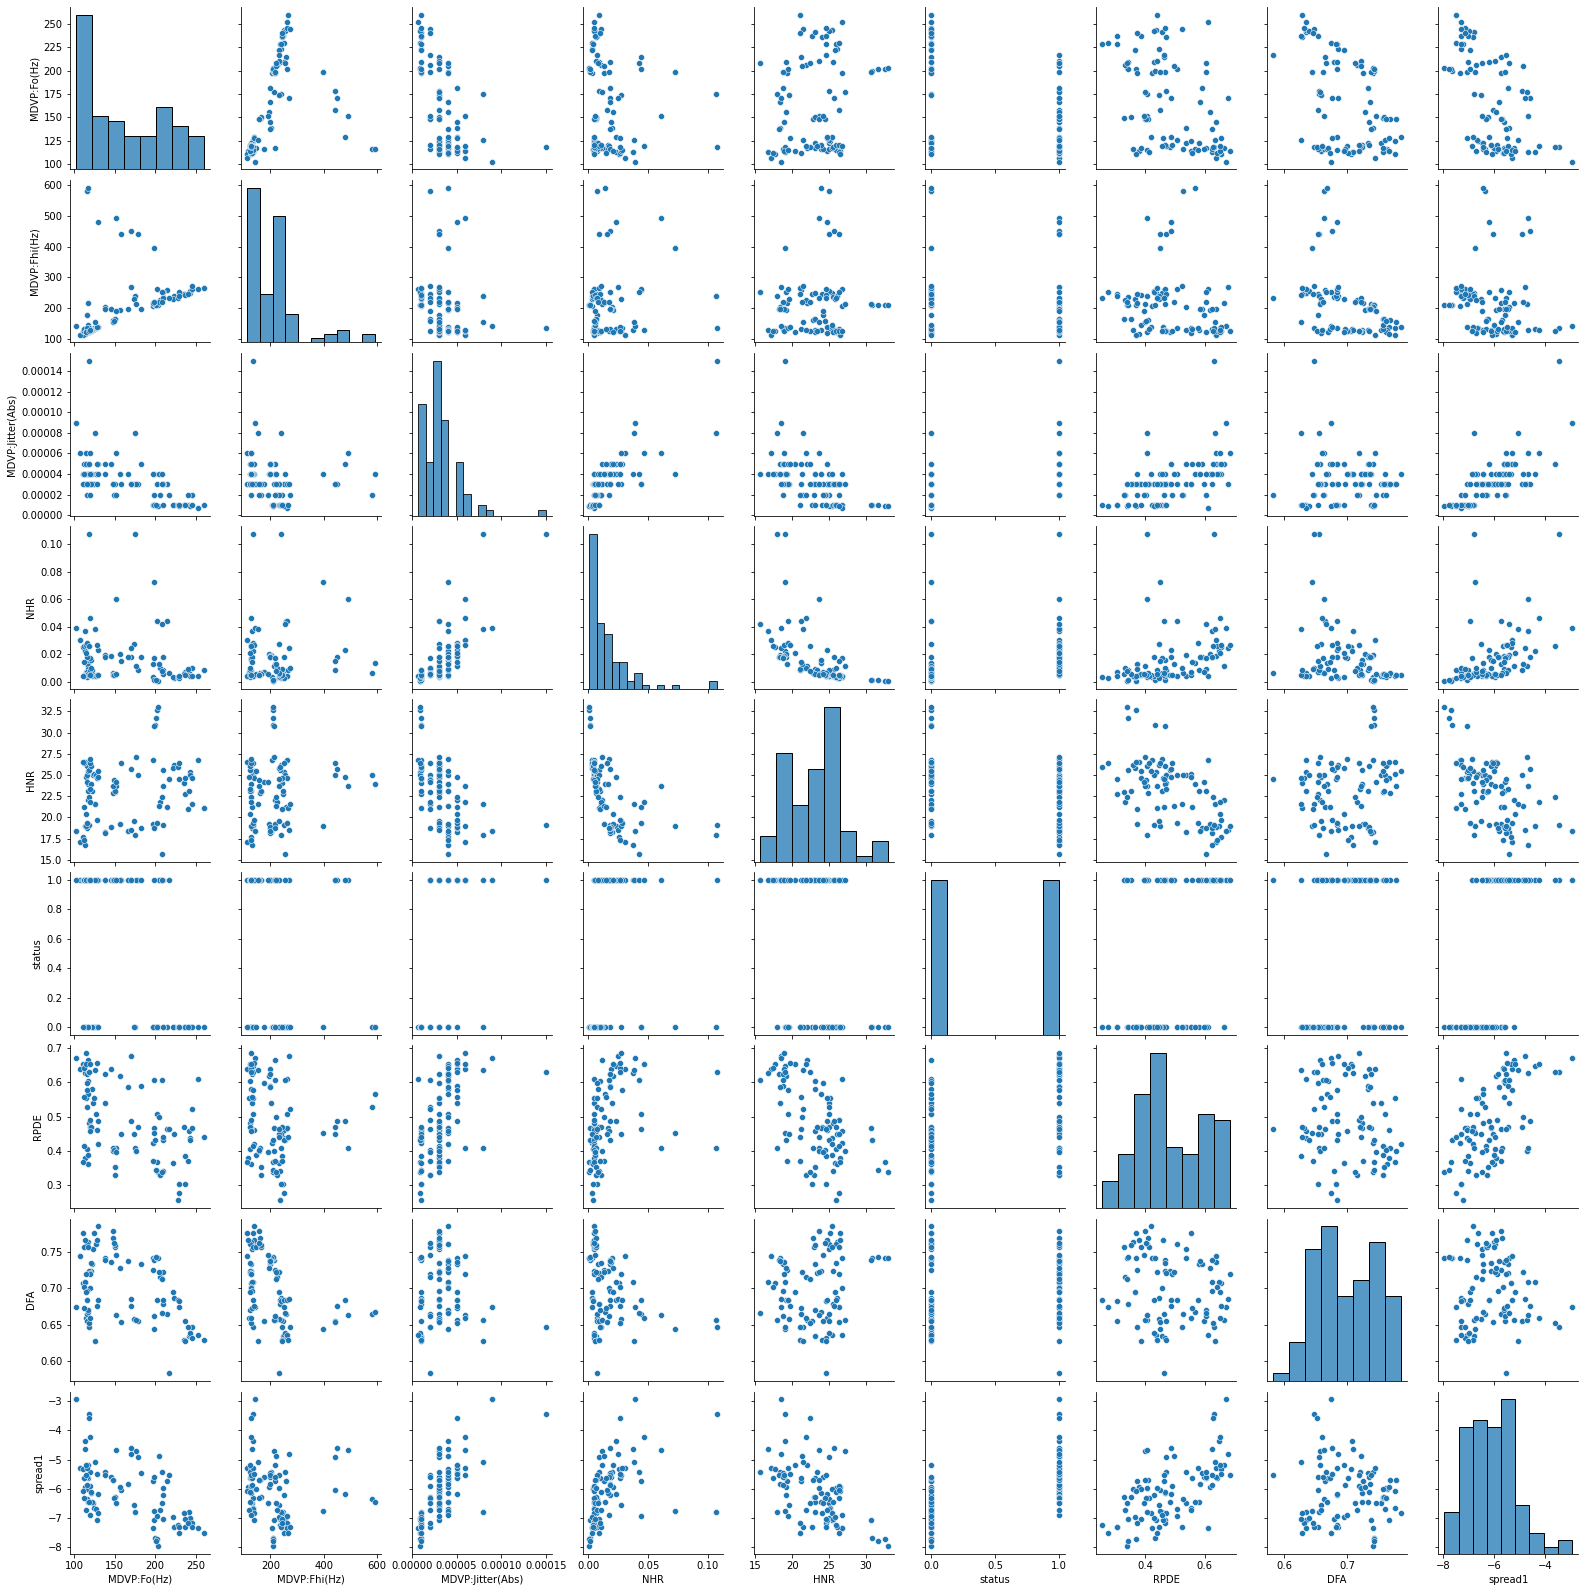

In [77]:
sn.pairplot(data_balanceada[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Jitter(Abs)','NHR','HNR','status','RPDE','DFA','spread1']])

---
**13) SELECCIÓN DEL MEJOR MODELO**
<p style='text-align: justify;'> Se entrenaron 10 modelos de clasificación con las distintas combinaciones realizadas. Los diez modelos son los siguientes:

1.  K-Nearest Neighbors
2.  Linear Support Vector Machine
3.  Radial Basis Function Kernel
4.  Gaussian Process
5.  Decision Trees
6.  Naive Bayes
7.  Random Forest
8.  Red neuronal
9.  Quantitative Descriptive Analysis)
10. AdaBoost

En todos los casos, el mejor modelo fue K-Nearest Neighbors. Para más detalle de los resultados puede consultar el <a href="https://drive.google.com/file/d/16HFtPKzCKs1AiQ3NOW1zpAqv4aRtPAbZ/view?usp=sharing"> artículo </a> 
</p>

---

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
        "Decision Tree","Random Forest","Neural Net","AdaBoost", 
        "Naive Bayes","QDA"]

classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel='linear'),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Reemplazar la variable combinacion_0# por cualquiera de las otras combinaciones para observar su puntaje de precisión
# Reemplazar combinacion_0# por data_balanceada para observar la precisión al entrenar el modelo con todas las variables

X = combinacion_05.drop(['name','status'], axis=1).values
X = StandardScaler().fit_transform(X)
y = combinacion_05['status'].values

# Validación cruzada
for name, classifier in zip(names, classifiers):
    print(name,end=' → ')
    scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    print(round(scores.mean(),4))

Nearest Neighbors → 0.9789
Linear SVM → 0.7667
RBF SVM → 0.83
Gaussian Process → 0.9256
Decision Tree → 0.7656
Random Forest → 0.8011
Neural Net → 0.81
AdaBoost → 0.7789
Naive Bayes → 0.7267
QDA → 0.7156


**14) OPORTUNIDADES DE MEJORA**

<p style='text-align: justify;'> Analizar la presencia de modificadores de efecto. Estas variables pueden alterar la asociación entre otras variables de entrada y la variable de salida, aumentando falsamente el puntaje de precisión del modelo. Por ejemplo, los pacientes con Parkinson presentan un mayor valor en la frecuencia máxima. Sin embargo, este valor también es influenciado por el sexo y las preferencias del paciente en su forma de hablar. Esta asociación debe ser demostrada por medio de pruebas estadísticas.
<p style='text-align: justify;'> Para hacer esto, se debería añadir una variable que indique el sexo del paciente. Luego de analizar la normalidad de las variables, se realizarían análisis bivariados o multivariados y observar si la asociación entre las variables de entrada y la variable de salida se ve afectada. </p>
<p style='text-align: justify;'> Otros modificadores de efecto que podrían analizarse son la edad del paciente y el tiempo desde que se le diagnosticó la enfermedad. </p>